# **Imports**

In [1]:
import os
from load import embed, analyze
from query import get_answer, get_pipe
from wiki import get_details
from news import get_news
from dotenv import load_dotenv
from palmquery import ask_palm

load_dotenv()
model_type=os.getenv('model')

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **Data Analysis and Data Viz**

                                             |          | [  0%]   00:00 -> (? left)

/home/abshk/anaconda3/envs/nlp/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/home/abshk/anaconda3/envs/nlp/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/home/abshk/anaconda3/envs/nlp/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
/home/abshk/anaconda3/envs/nlp/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and wil

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



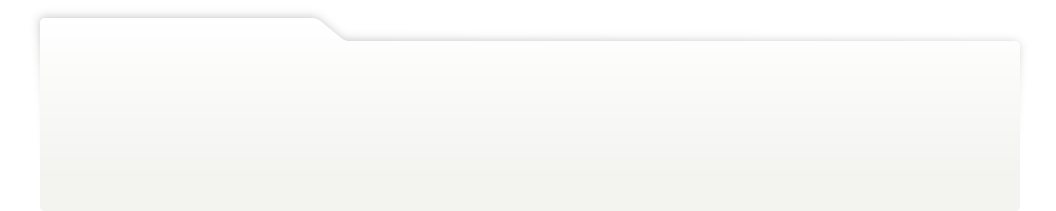
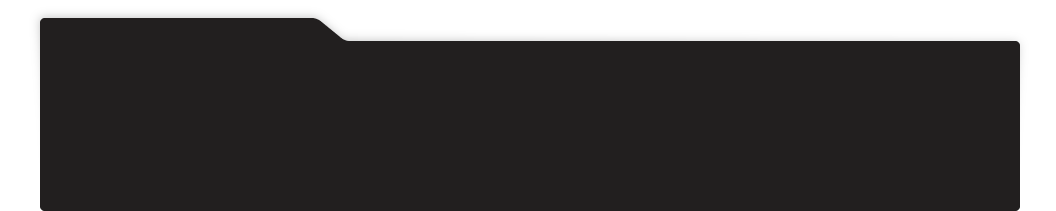
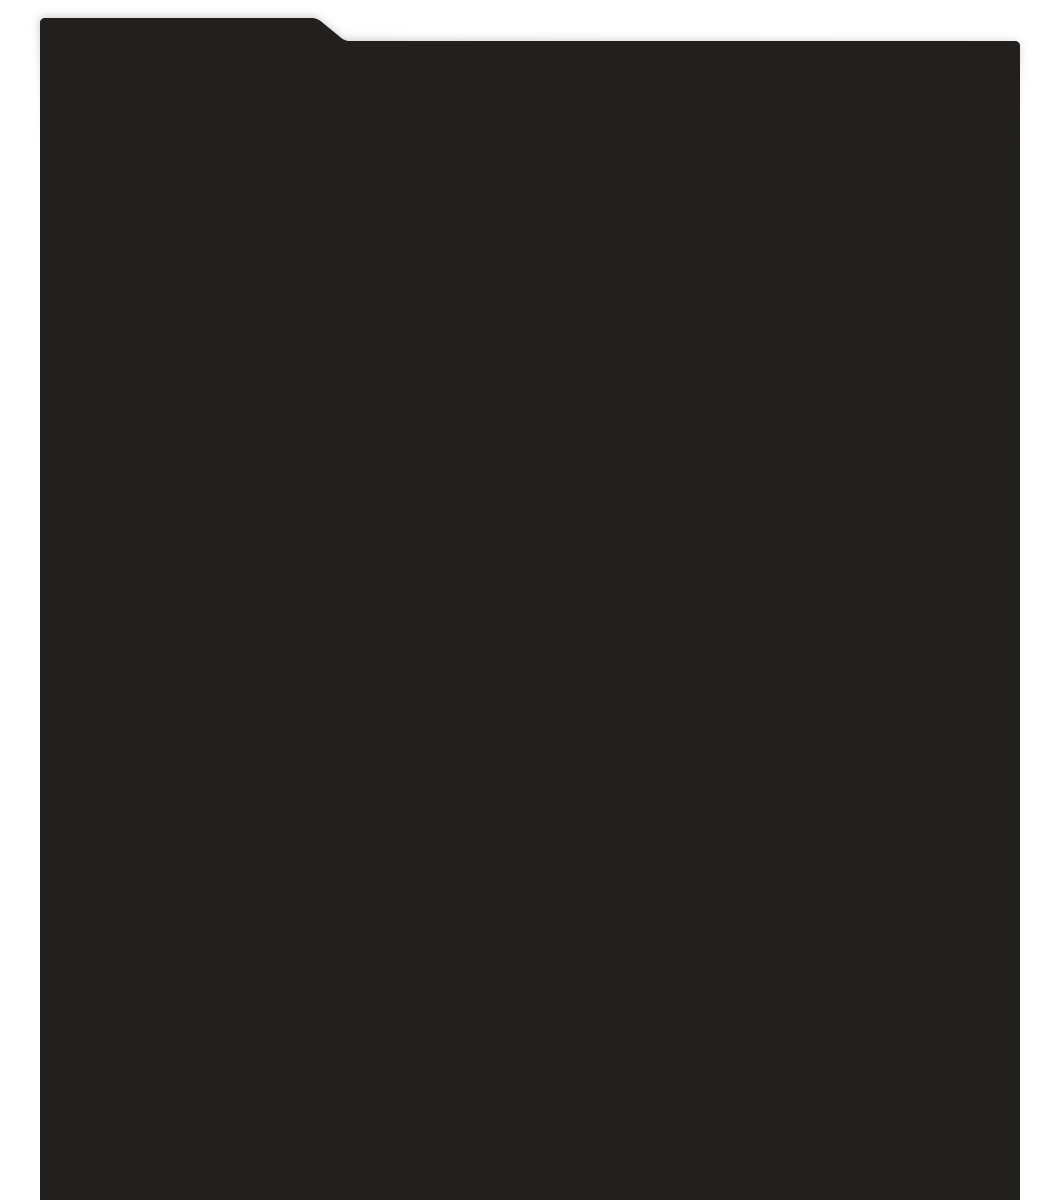
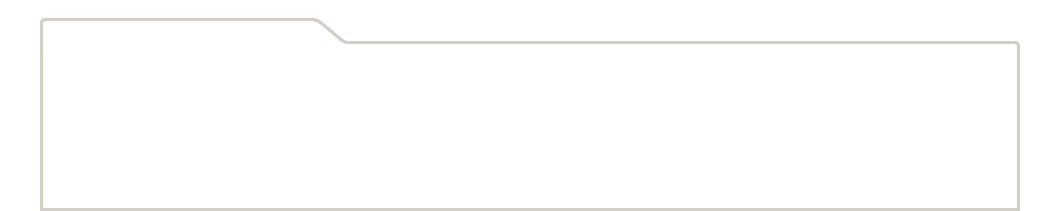
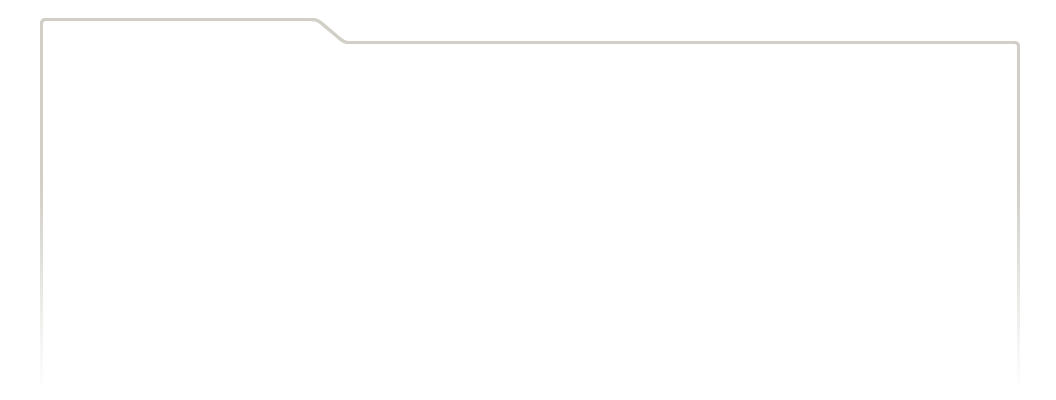
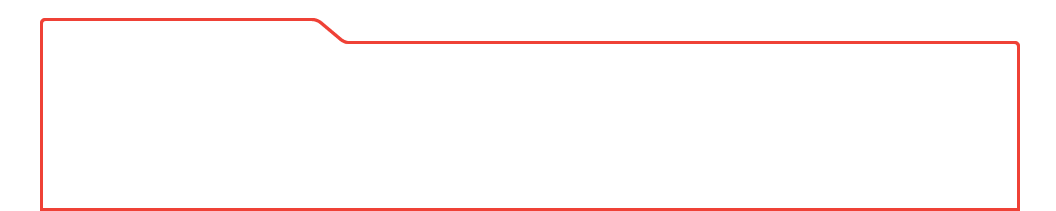
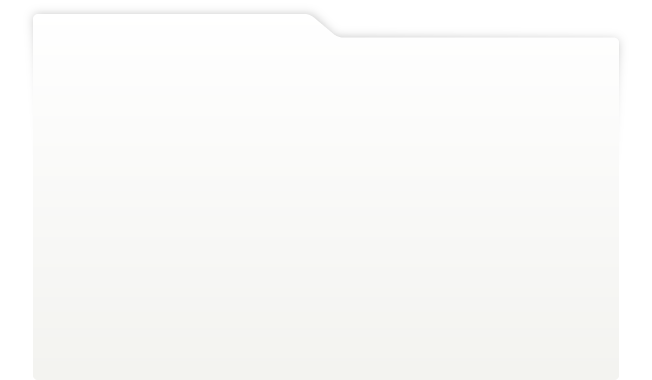
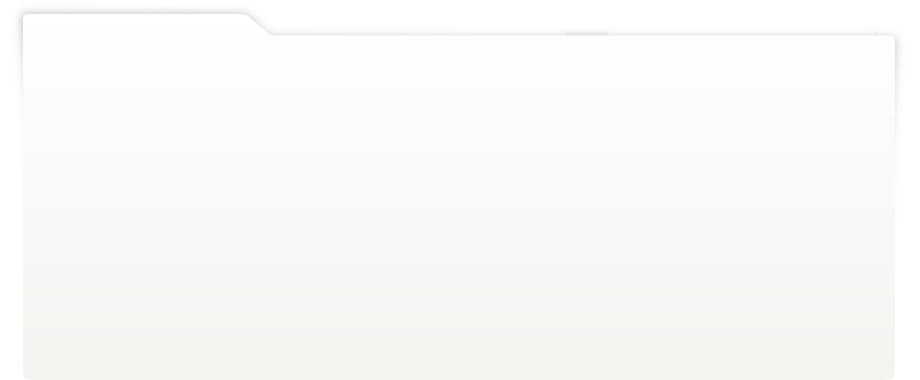
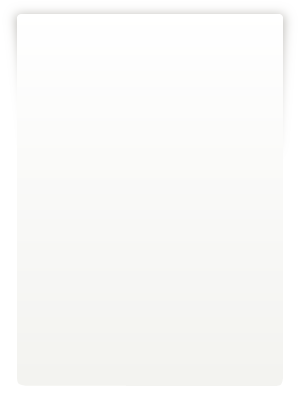
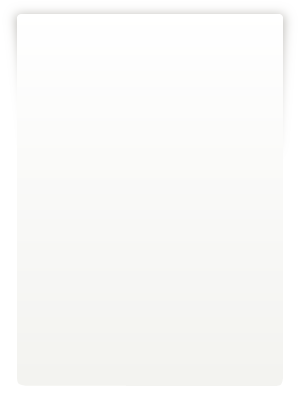
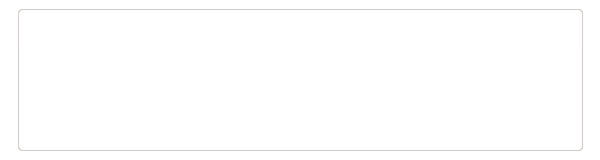
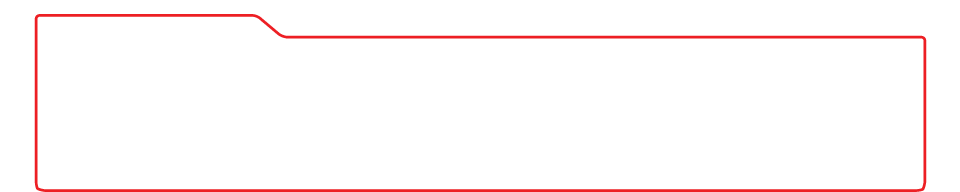
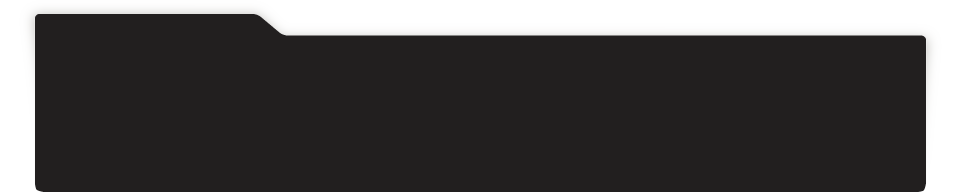
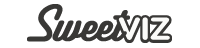
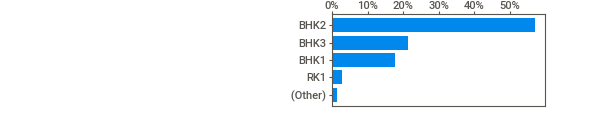
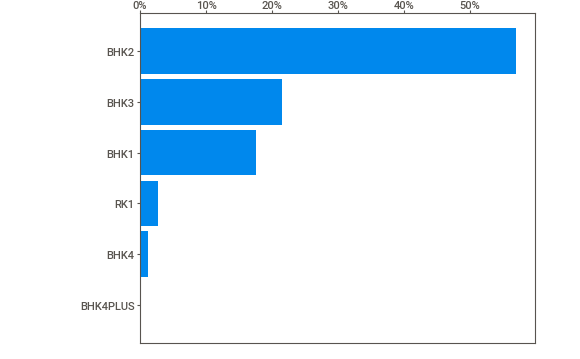
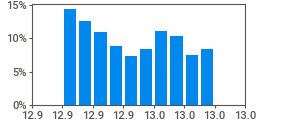
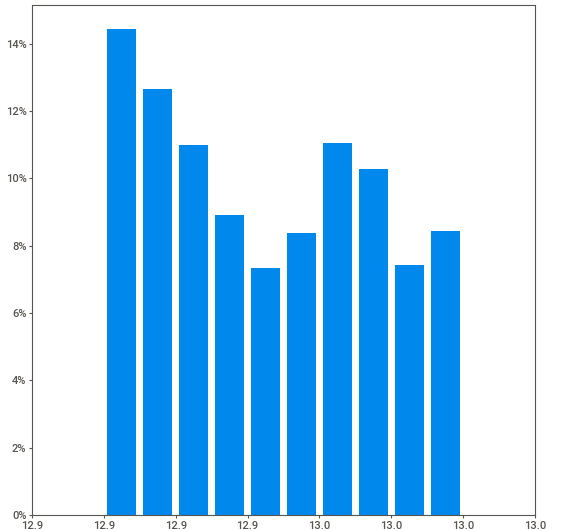
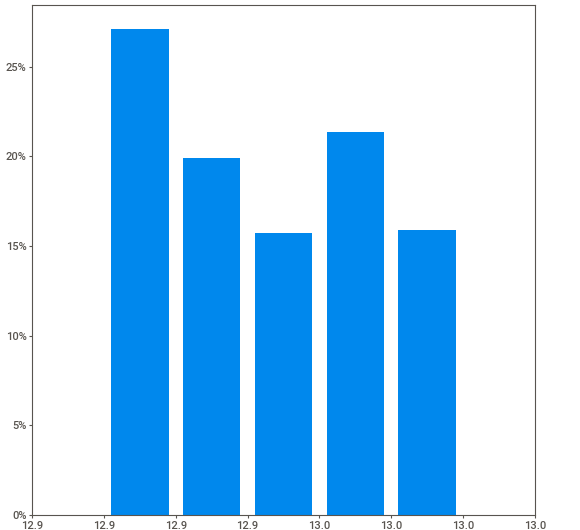
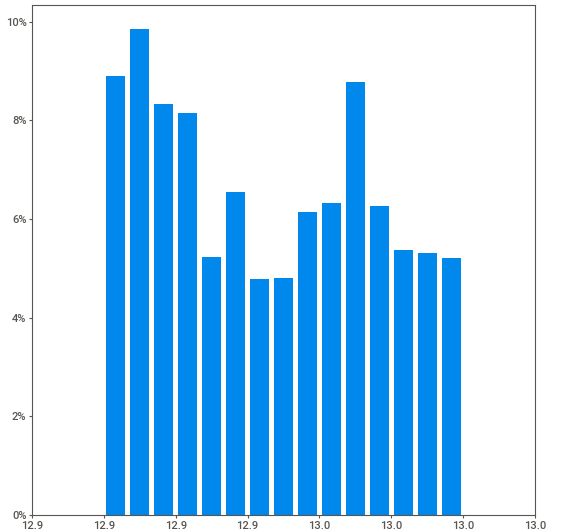
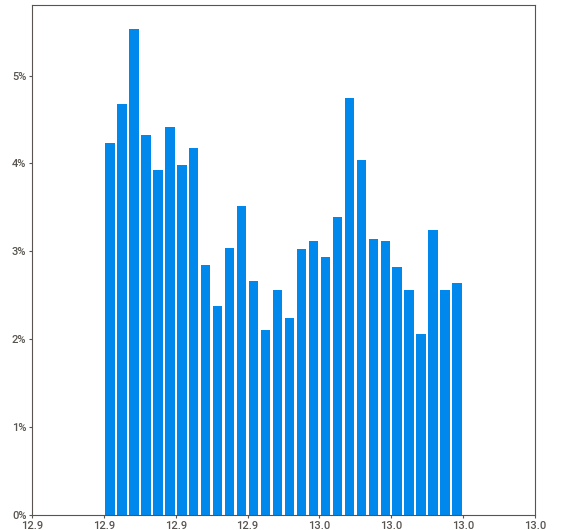
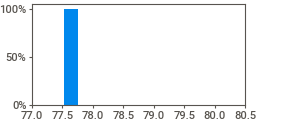
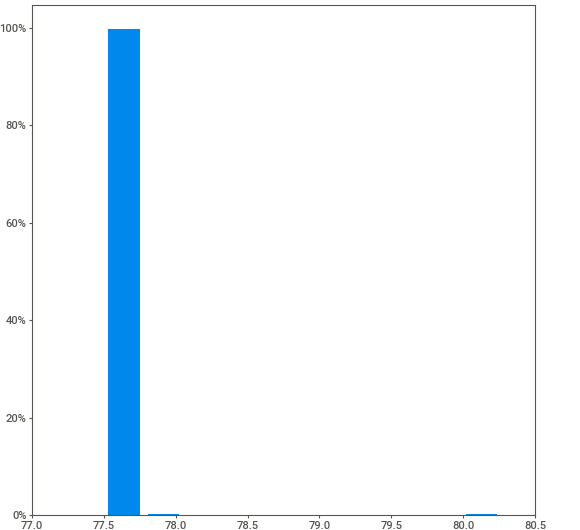
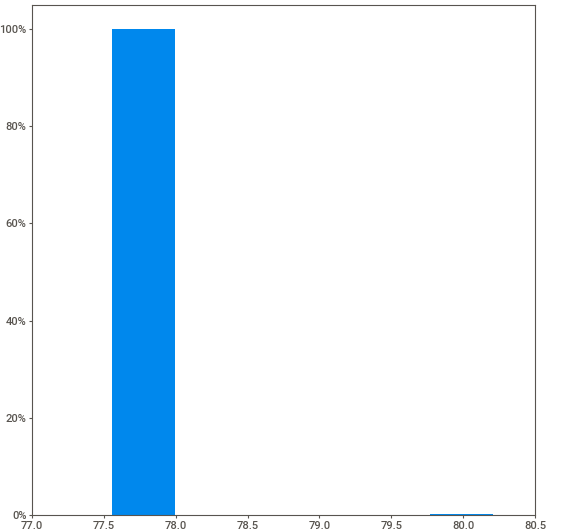
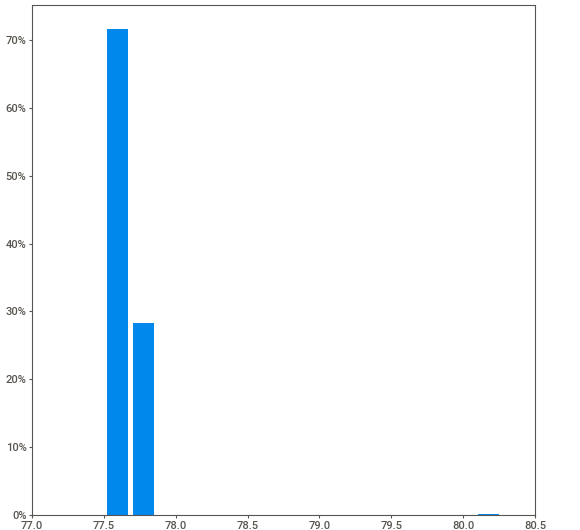
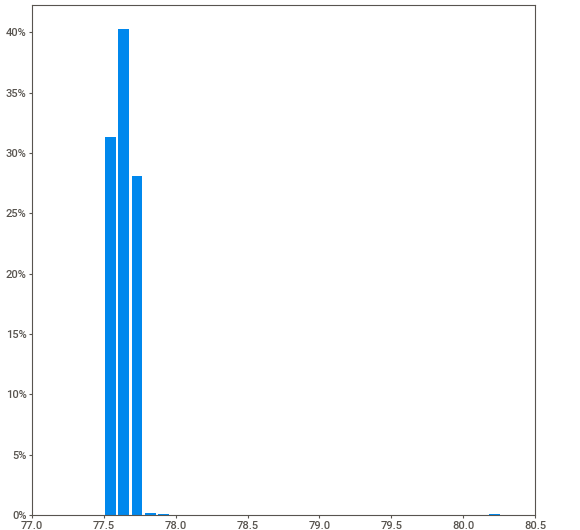
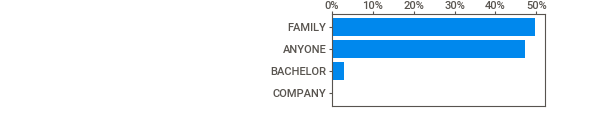
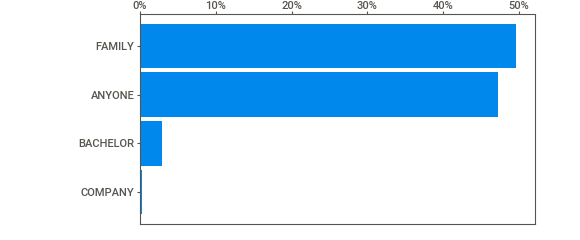
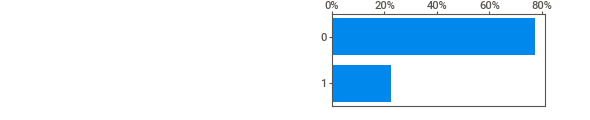
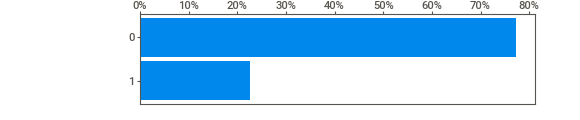
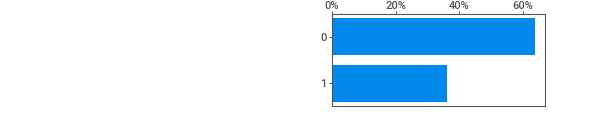
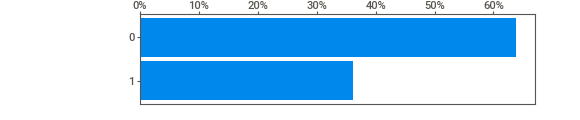
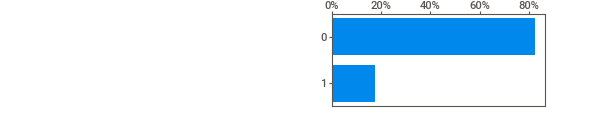
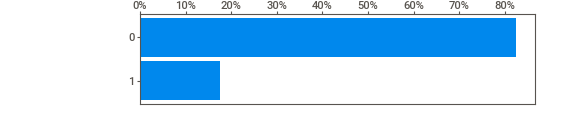
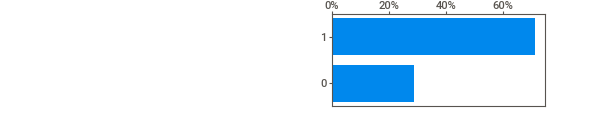
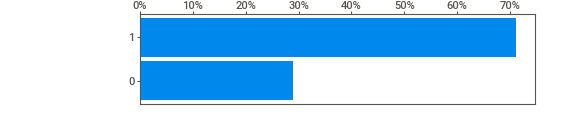
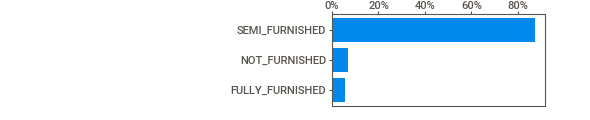
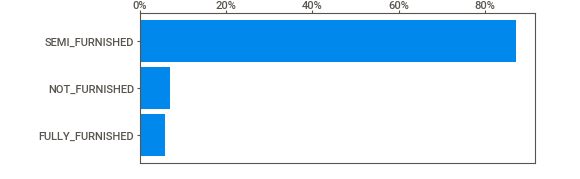
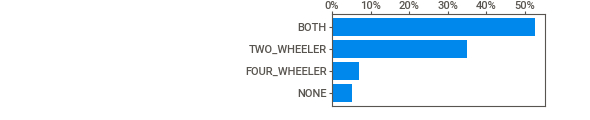
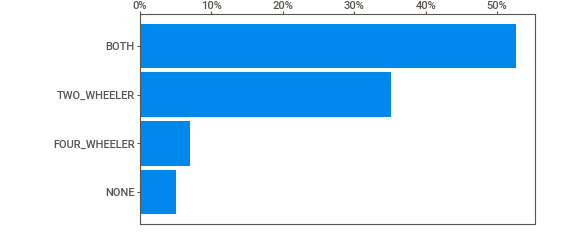
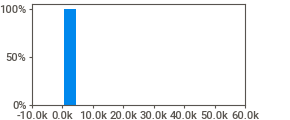
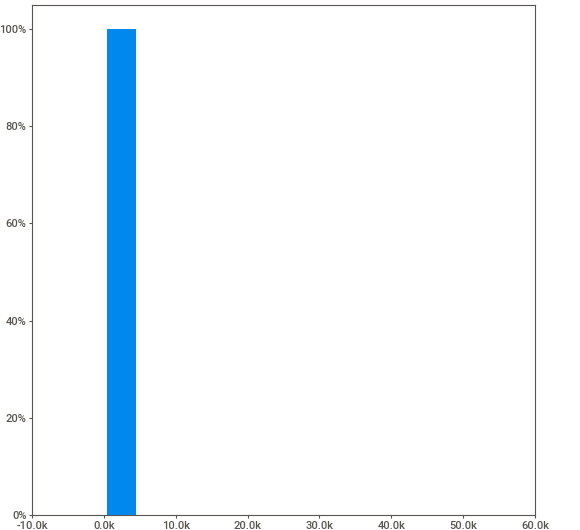
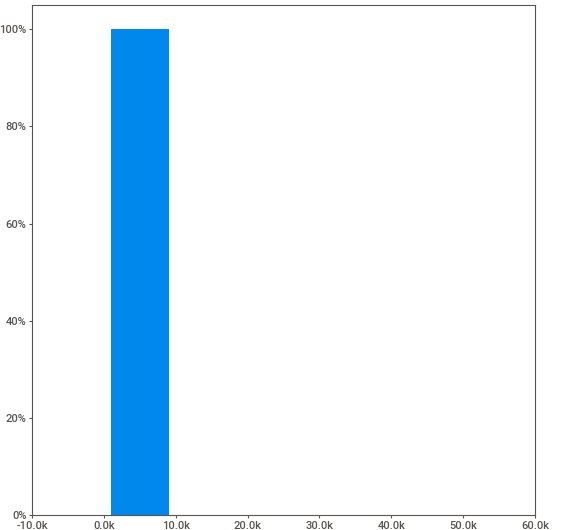
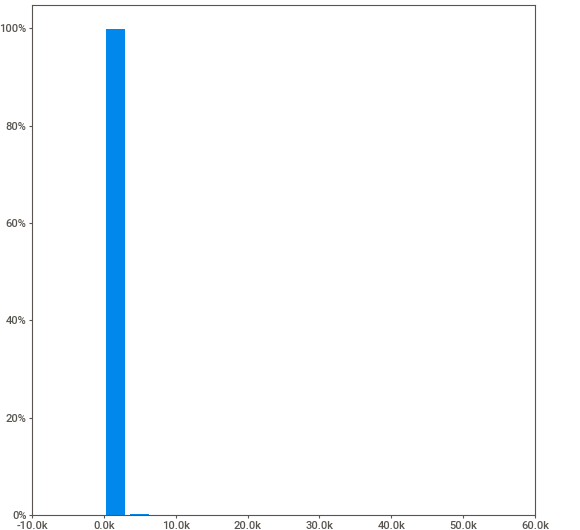
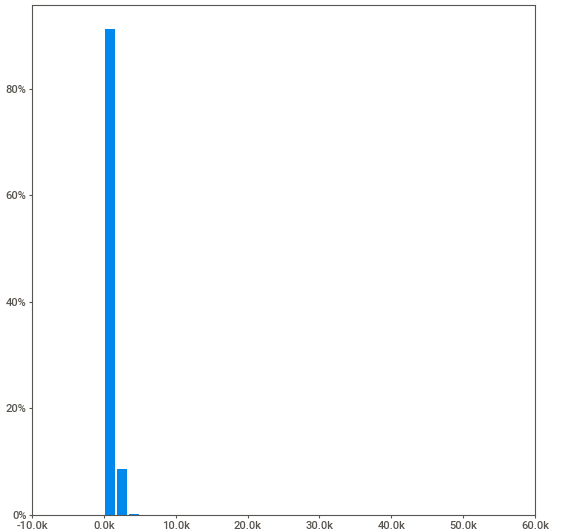
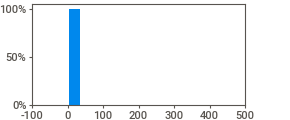
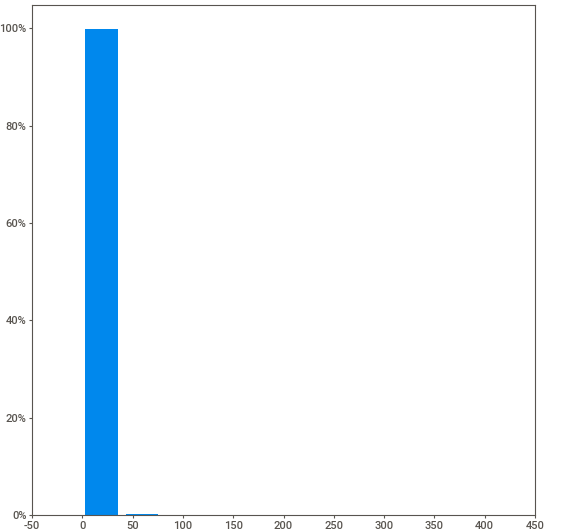
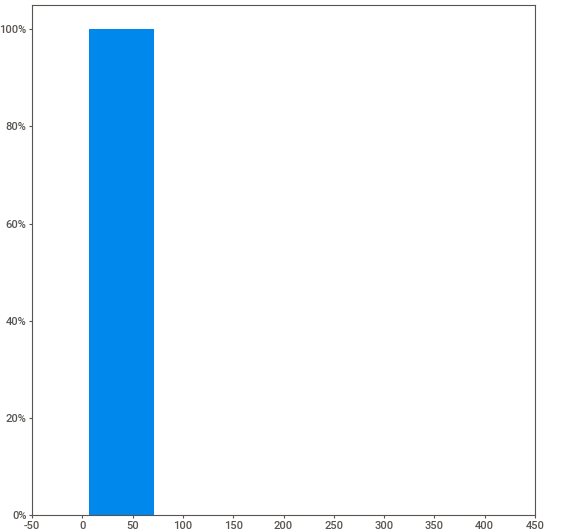
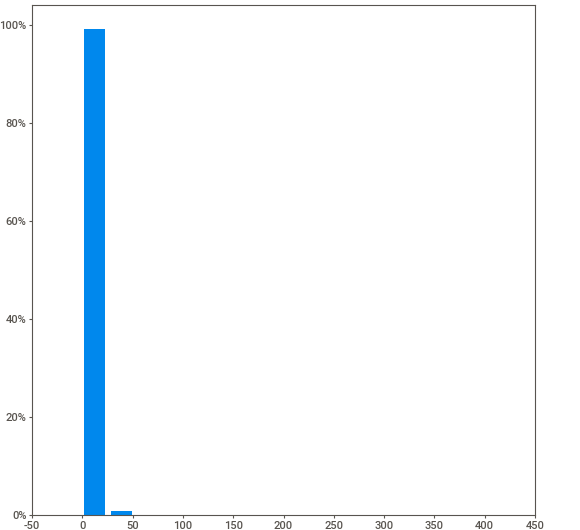
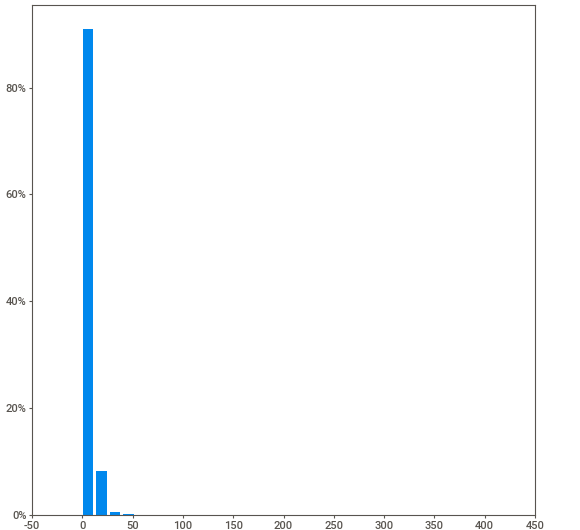
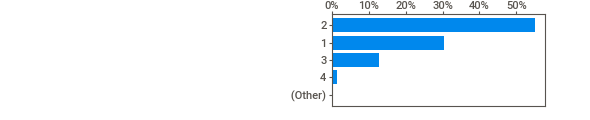
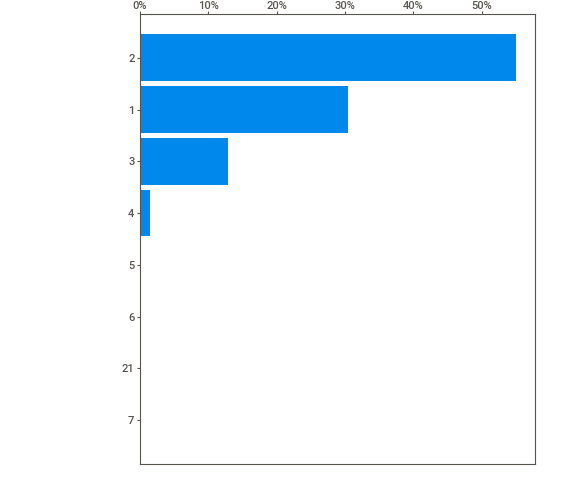
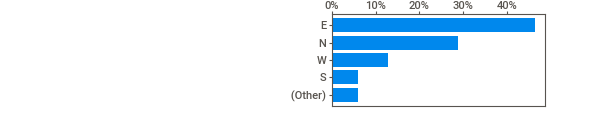
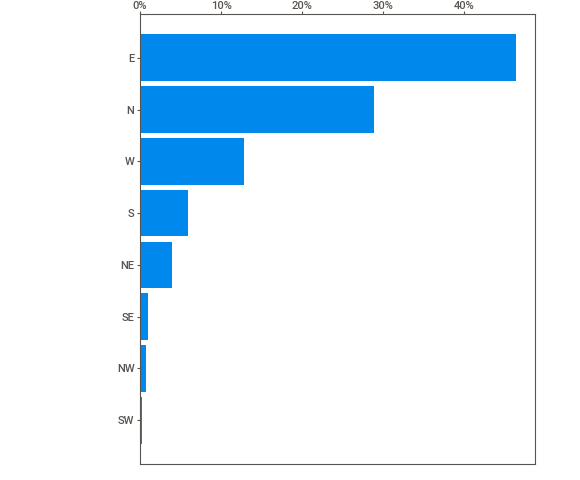
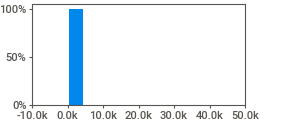
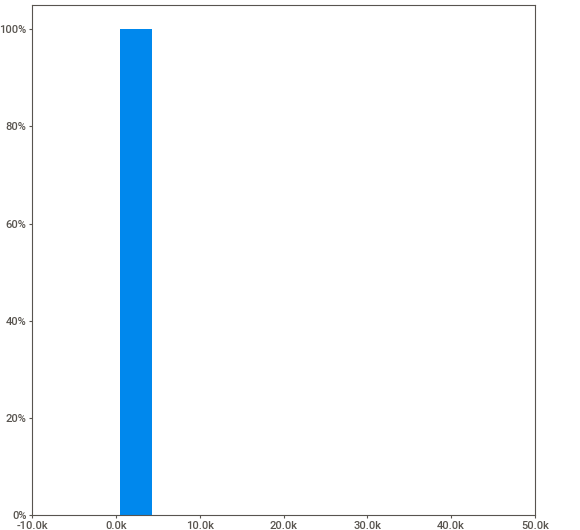
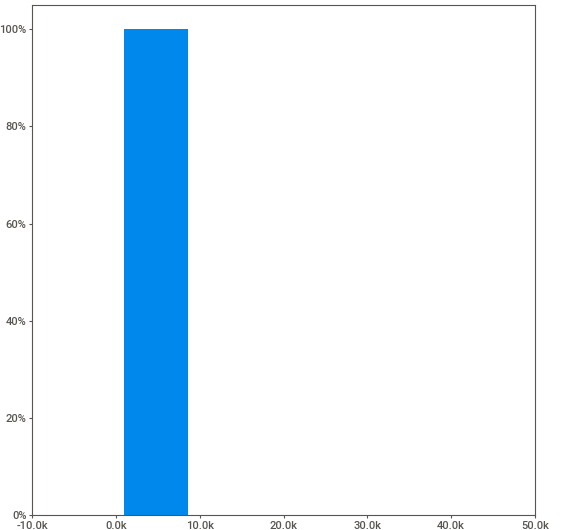
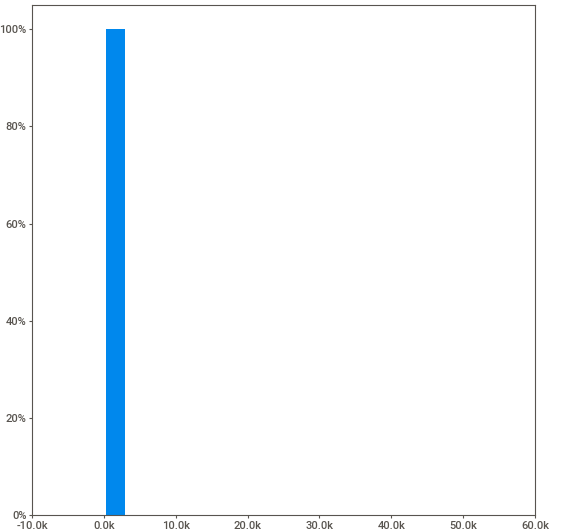
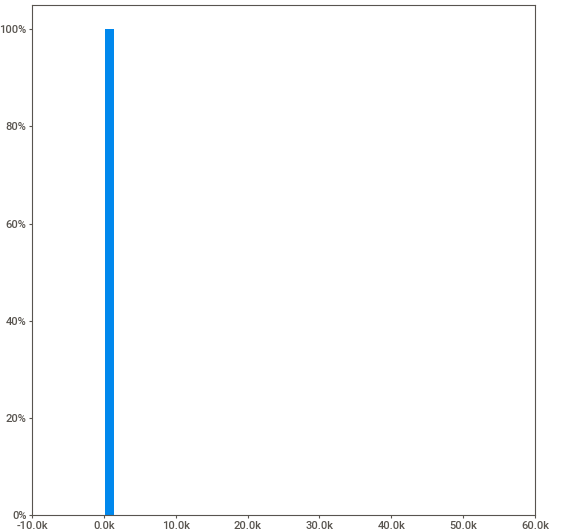
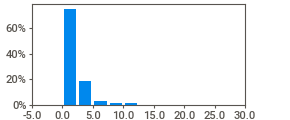
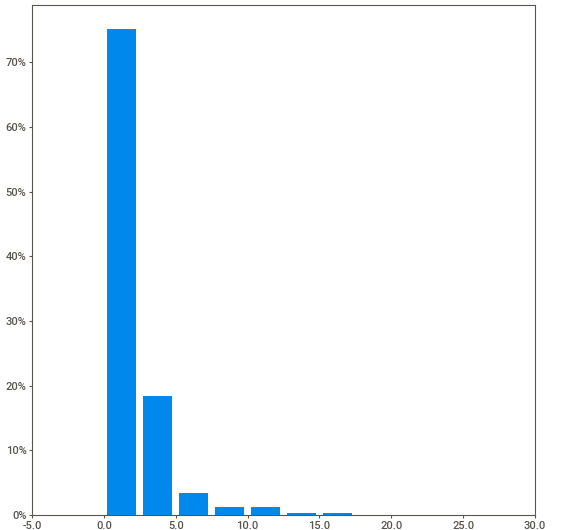
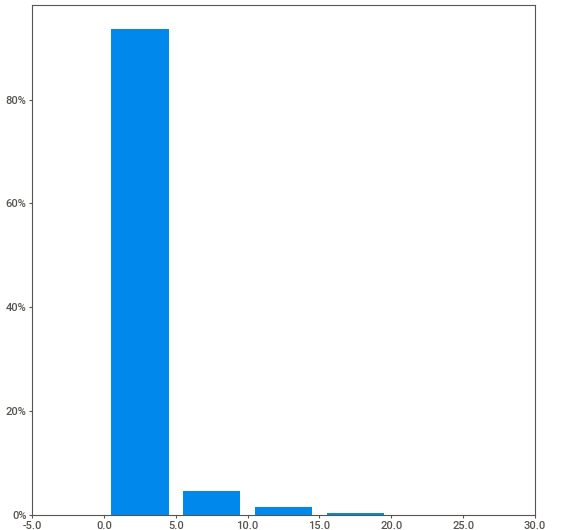
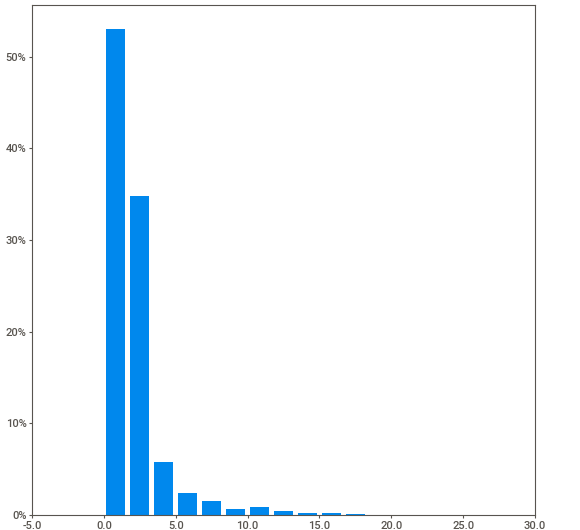
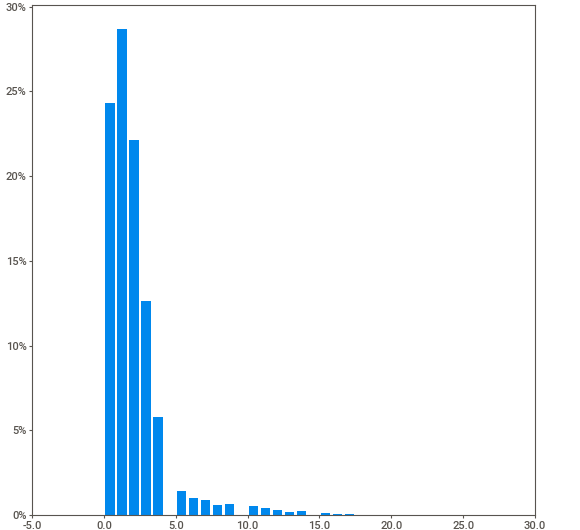
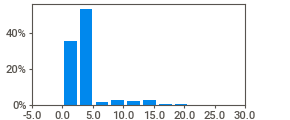
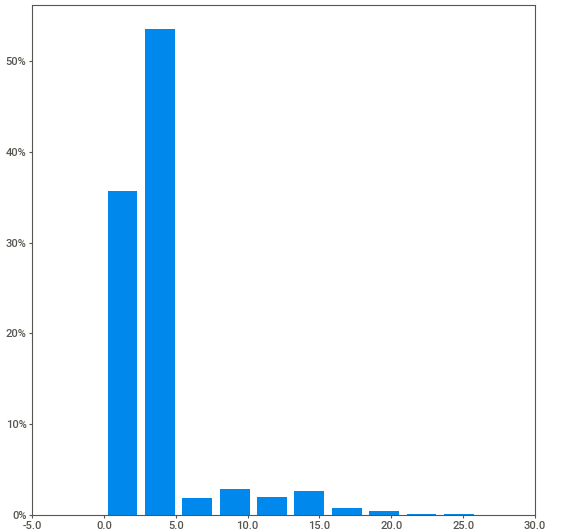
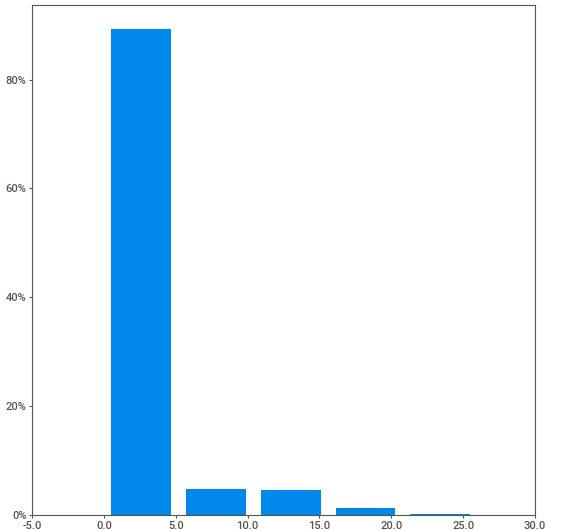
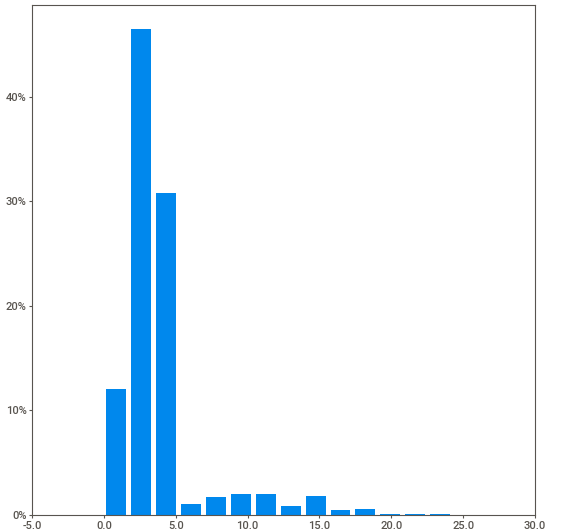
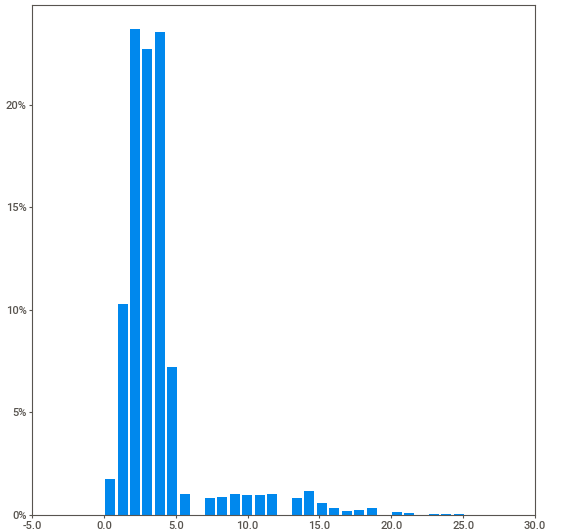
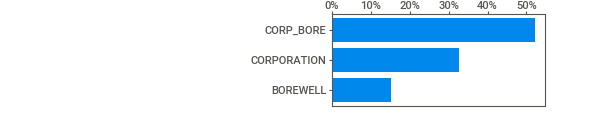
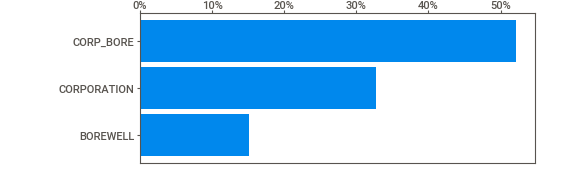
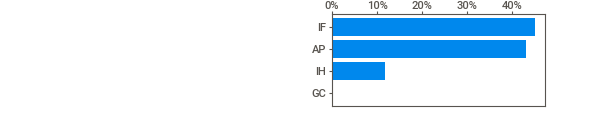
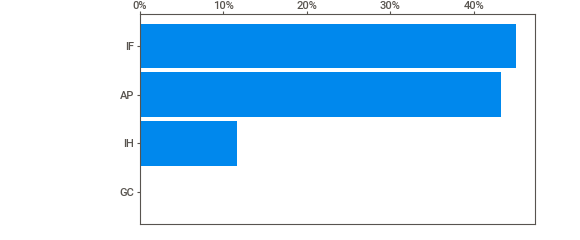
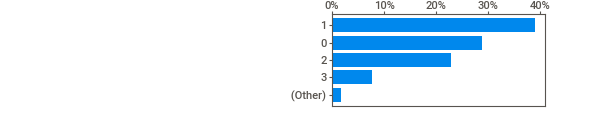
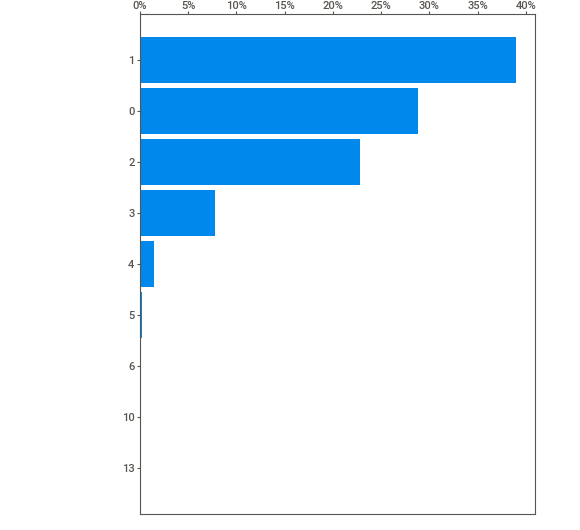
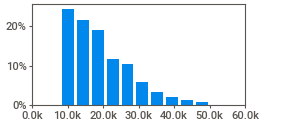
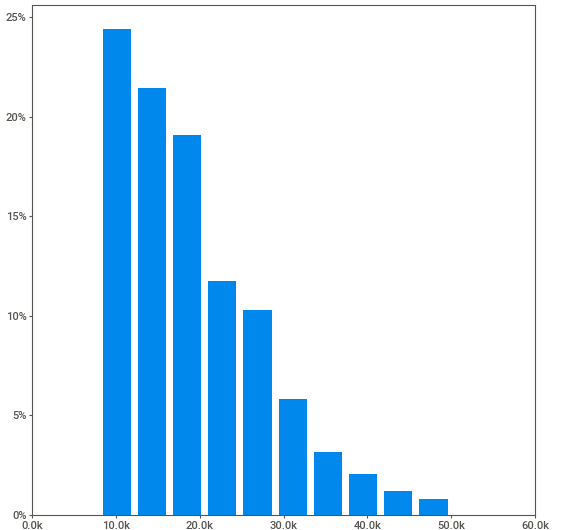
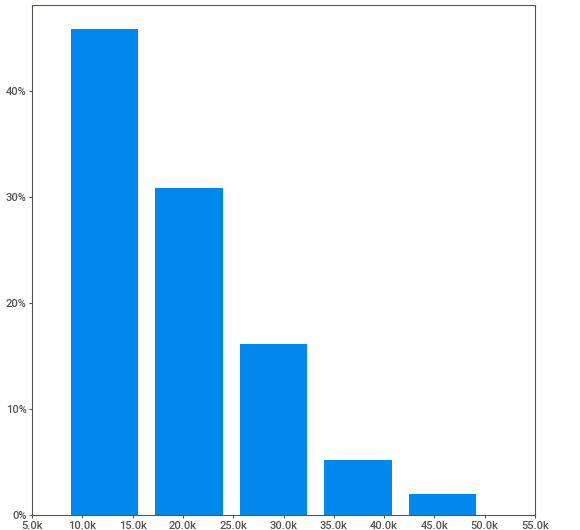
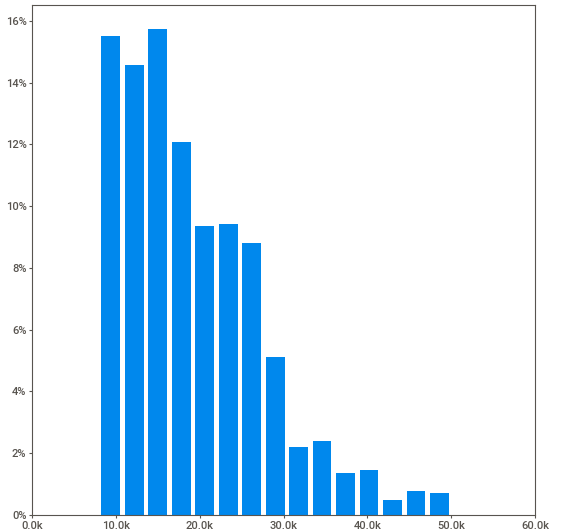
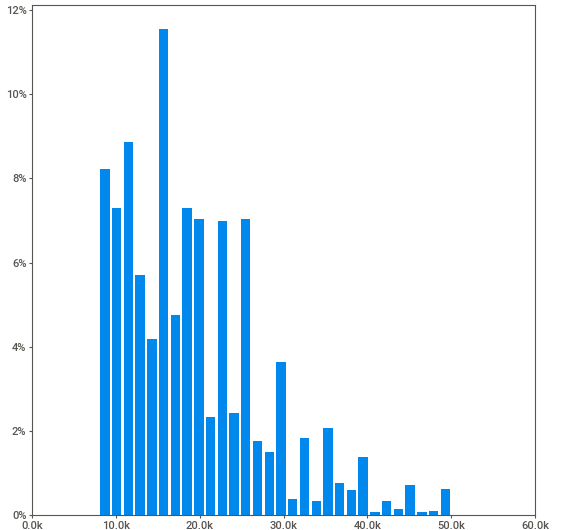
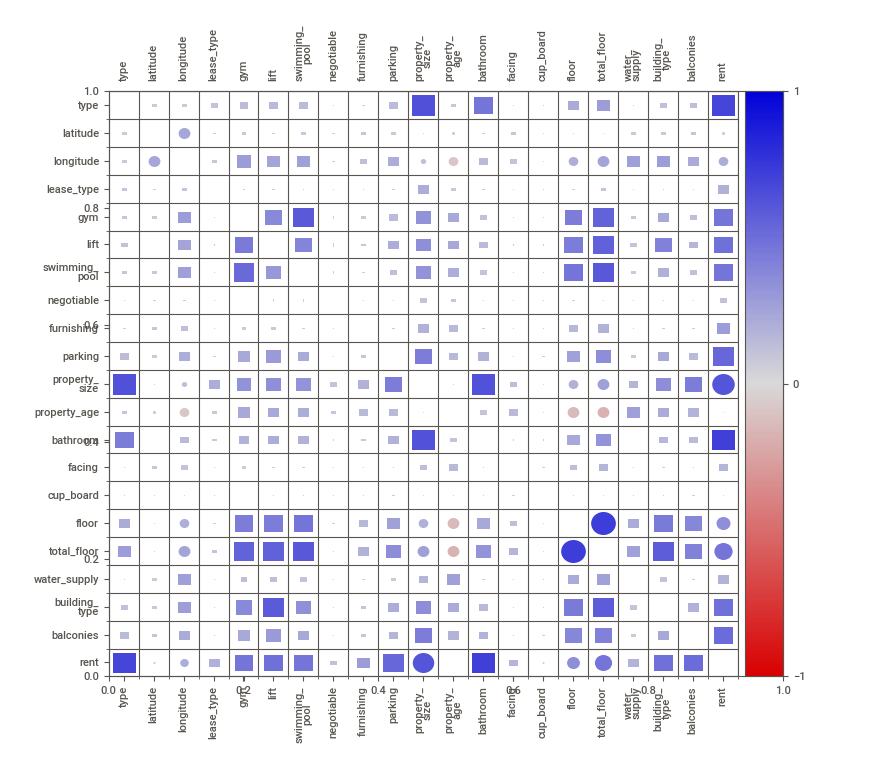
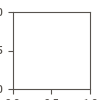

In [2]:
report = analyze("samples/train.csv")
report.show_notebook()

# **Text Content Generation from Wiki via NER:**

In [3]:
#Content Generation based on important keywords from a text snippet:

text = """In the heart of technological innovation, Tesla Inc. emerges as a pioneering force, pushing the boundaries of electric mobility and sustainable energy solutions. Founded by Elon Musk, Tesla has become synonymous with cutting-edge electric vehicles, where sleek designs meet unparalleled performance. The Model S, Model X, Model 3, and Model Y have redefined the automotive landscape, blending high-performance capabilities with a commitment to reducing our carbon footprint.
Beyond electric cars, Tesla has made waves in energy storage and solar technology. The Powerwall and Powerpack offer scalable energy storage solutions, while the Solar Roof seamlessly integrates solar technology into residential architecture, fostering a vision of a cleaner, more sustainable future.
As Tesla continues to steer the automotive and energy industries towards innovation, its relentless pursuit of advancements in artificial intelligence, autonomous driving, and renewable energy cements its status as a transformative force in the modern era. The story of Tesla unfolds at the intersection of innovation, sustainability, and a vision for a planet powered by clean energy."""

content = get_details(text)
content

  0%|          | 0/10 [00:00<?, ?it/s]

The Model S
The Model S not found. Redirecting to Tesla_Model_S


 10%|█         | 1/10 [00:03<00:35,  3.96s/it]

Model Y
Model Y not found. Redirecting to Tesla_Model_Y


 20%|██        | 2/10 [00:06<00:25,  3.17s/it]

Powerwall
Powerwall not found. Redirecting to Tesla_Powerwall


 30%|███       | 3/10 [00:08<00:19,  2.75s/it]

Tesla
Tesla not found. Redirecting to Tesla,_Inc.


 40%|████      | 4/10 [00:11<00:16,  2.80s/it]

Model X
Model X not found. Redirecting to Tesla_Model_X


 50%|█████     | 5/10 [00:14<00:13,  2.66s/it]

Model 3
Model 3 not found. Redirecting to Tesla_Model_3


 60%|██████    | 6/10 [00:16<00:10,  2.73s/it]

Elon Musk
Elon Musk not found. Redirecting to Elon_Musk


 70%|███████   | 7/10 [00:20<00:08,  2.92s/it]

Powerpack
Powerpack not found. Redirecting to Tesla_Powerpack


 80%|████████  | 8/10 [00:23<00:05,  2.87s/it]

Solar Roof
Solar Roof not found. Redirecting to Tesla_Energy


 90%|█████████ | 9/10 [00:25<00:02,  2.79s/it]

Tesla Inc.
Tesla Inc. not found. Redirecting to Tesla,_Inc.


100%|██████████| 10/10 [00:27<00:00,  2.78s/it]


({'The Model S': 'The Tesla Model S is a battery electric full-size car with a liftback body style built by Tesla, Inc. since 2012. The Model S features a battery-powered dual-motor, all-wheel drive layout, although earlier versions featured a rear-motor and rear-wheel drive layout.Development of the Model S began prior to 2007, under the codename "WhiteStar". The Model S was officially announced on June 30, 2008, and a prototype vehicle was unveiled in March 2009. The Model S debuted on June 22, 2012. A revised, dual-motor, all-wheel-drive version, known as the 60D, debuted on October 9, 2014. The 60D was followed by the 70D, which made dual-motor and all-wheel drive the standard, followed by the 85D, P85D, and P90D. Along with these updates, Tesla offered the Autopilot driving assistance system. The first major design refresh came in April 2016 when the Model S was updated with a new front hood design. In October of the same year, hardware became standard that supports Tesla\'s Full 

# **RAG Implementation - Document Loading, Embedding, Querying**

Scanned Marksheet:

In [4]:
#DOCUMENT LOADING AND QUERYING:

q="What are the subjects that are present in the marksheet"

embed("samples/marksheet.jpg", scanned=True) #Gets text via OCR and then embeds it automatically
rqa = get_pipe(model_type)
response=get_answer(query=q, RQA=rqa, palm=True)

print("\n",response[1])

documents/OCR-marksheet.pdf


Output()

Output()

Output()

Output()

Output()

load INSTRUCTOR_Transformer
max_seq_length  512
Exisiting vectorDB found
Vector Embeddings for this file already exists
Document Embedded!
load INSTRUCTOR_Transformer
max_seq_length  512

 The subjects that are present in the marksheet are:

* Fundamentals of Digital Systems
* Data Structures Lab
* Engineering Drawing
* Digital Systems Lab
* Physics Lab


PDF Text Document:

In [5]:
q="Summarize the steps involved in SSH automation from the documentation"
embed("samples/techdocument.pdf")
response=get_answer(query=q, RQA=rqa, palm=True)
print("\n",response[1])

load INSTRUCTOR_Transformer
max_seq_length  512
Exisiting vectorDB found
Vector Embeddings for this file already exists
Document Embedded!

 The steps involved in SSH automation are as follows:

1. Install openssh-server on both the source and destination machines.
2. Create a parameter text file that specifies the destination machine(s) and the user(s) who will be authenticated.
3. Generate a signed certificate for each user on the destination machine(s).
4. Copy the user public key to the source machine.
5. Add the certificate to the sshd_config file on the source machine.
6. Restart the ssh service on the source machine.
7. Run the automate executable with the parameter text file as an argument.

The automate executable will then connect to each destination machine and authenticate the user(s) specified in the parameter text file.


# **Daily News Data:**

In [9]:
import pandas as pd
from palmquery import ask_palm
from geminiquery import ask_gemini
from news import get_news
df=get_news("Vijayakanth")

-- News Articles Collected: 106

-- Processing: 101

-- Completed


In [10]:
df

,Date,Text
0,2023-12-29 09:59:21+05:30,The deceased body of DMDK president and actor ...
1,2023-12-28 09:09:13+05:30,DMDK founder-leader Vijayakanth passed away in...
2,2023-12-29 01:02:23+00:00,"December 29, 2023 06:32 am | Updated 06:48 pm ..."
3,2023-12-29 00:00:00,Legendary actor and Desiya Murpokku Dravids Ka...
4,2023-12-29 15:35:32+05:30,Tamil superstar Joseph Vijay was attacked with...
...,...,...
96,2023-12-28 00:00:00,DMDK chief and yesteryear actor Vijayakanth di...
97,2023-12-28 17:11:49+05:30,"Vijayakanth\n\nSeventy-one year old, actor-pol..."
98,2023-12-28 06:33:23+05:30,Covid-19 JN.1 news Highlights: INSACOG says 15...
99,2023-12-28 09:22:05+05:30,DMDK founder and actor Captain Vijayakanth pas...


In [14]:
#A news article
print(df.iloc[99,1])

DMDK founder and actor Captain Vijayakanth passed away at a private hospital in Chennai at the age of 71 on Thursday. He was on ventilatory support following his admission for pneumonia after he tested positive for Covid 19.

MIOT International hospital said in a press release: "Captain Vijayakanth was on ventilatory support following his admission for pneumonia. Despite the best efforts of the medical staff, he passed away in the morning on 28th December 2023."

A large crowd thronged his residence soon after the news broke with DMDK supporters mourning the death of the veteran leader.

Expressing grief over the demise of the leader, PM Modi tweeted "Extremely saddened by the passing away of Thiru Vijayakanth Ji. A legend of the Tamil film world, his charismatic performances captured the hearts of millions. As a political leader, he was deeply committed to public service, leaving a lasting impact on Tamil Nadu’s political landscape. His passing leaves a void that will be hard to fill.

# **10 points - Text Summarization:**

News article:

In [15]:
summary=ask_gemini(df.iloc[99,1], summary=True)
print(summary)

1. DMDK founder and actor Captain Vijayakanth passed away at 71 on December 28, 2023.
2. He was admitted to a Chennai hospital with pneumonia after testing positive for Covid-19.
3. Despite medical efforts, he passed away on the morning of December 28th.
4. A large crowd gathered at his residence to mourn the loss of the veteran leader.
5. Prime Minister Modi expressed grief over Vijayakanth's passing, highlighting his contributions to Tamil cinema and politics.
6. Rahul Gandhi also tweeted condolences, acknowledging Vijayakanth's impact on cinema and politics.
7. Vijayakanth's performances captured the hearts of millions, leaving a lasting legacy in Tamil cinema.
8. As a political leader, he was dedicated to public service, influencing Tamil Nadu's political landscape.
9. His demise has created a void that will be challenging to fill.
10. His contributions to both cinema and politics have left an indelible mark on millions of people.


In [18]:
content[0]['Solar Roof']

"Building-integrated photovoltaics (BIPV) are photovoltaic materials that are used to replace conventional building materials in parts of the building envelope such as the roof, skylights, or façades. They are increasingly being incorporated into the construction of new buildings as a principal or ancillary source of electrical power, although existing buildings may be retrofitted with similar technology. The advantage of integrated photovoltaics over more common non-integrated systems is that the initial cost can be offset by reducing the amount spent on building materials and labor that would normally be used to construct the part of the building that the BIPV modules replace. In addition, BIPV allows for more widespread solar adoption when the building's aesthetics matter and traditional rack-mounted solar panels would disrupt the intended look of the building.The term building-applied photovoltaics (BAPV) is sometimes used to refer to photovoltaics that are retrofit – integrated in

Wiki content from NER:

In [19]:
summary=ask_gemini(content[0]['Solar Roof'], summary=True)
print(summary)

1. Building-integrated photovoltaics (BIPV) are photovoltaic materials used to replace conventional building materials in parts of the building envelope.


2. BIPV can be used in new buildings or retrofitted to existing ones.


3. BIPV can offset the initial cost of construction by reducing the amount spent on building materials and labor.


4. BIPV allows for more widespread solar adoption when the building's aesthetics matter.


5. Building-applied photovoltaics (BAPV) refers to photovoltaics integrated into the building after construction.


6. BIPV applications began appearing in the 1970s and became commercially available in the 1990s.


7. BIPV systems may become the backbone of the zero energy building (ZEB) European target for 2020.


8. Technical challenges exist in making BIPV cost-competitive with photovoltaic panels.


9. Social barriers to widespread BIPV use include the conservative culture of the building industry and integration with high-density urban design.


10. Eff